In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from quam_libs.lib.save_utils import load_dataset


2024-11-09 15:34:48,958 - qm - INFO     - Starting session: e94e6100-4434-4463-b6fd-aa03e7d00107


In [2]:
meas_ids = [1985,1990,1995,2000,2005]

datas = {}
node_parameters = {}
machines = {}
gains = {}  

for meas_id in meas_ids:
    datas[meas_id], machines[meas_id], node_parameters[meas_id] = load_dataset(meas_id, "noise_spectrum")
    gains[meas_id] = machines[meas_id].qubits[node_parameters[meas_id]['initial_parameters']['qubits'][0]].resonator.frequency_converter_up.gain

# %%


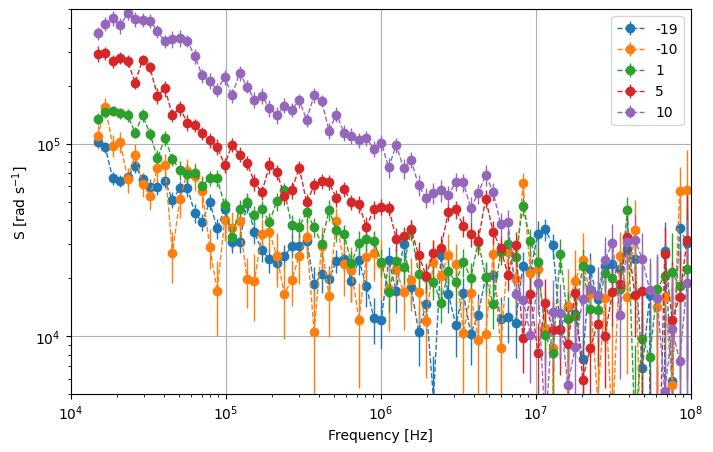

In [3]:
f,ax = plt.subplots(1,1, figsize = (8,5))

for meas_id in meas_ids:
    # datas[meas_id].S.plot(ax=ax, xscale='log', yscale='log', x = "freq", lw = 0,marker = 'o', label=f'{meas_id} {gains[meas_id]}')
    ax.errorbar(datas[meas_id].freq, datas[meas_id].S.isel(qubit = 0), yerr = datas[meas_id].S_error.isel(qubit = 0), 
                fmt='o', label=f'{gains[meas_id]}', lw = 1, ls = '--')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('S [rad s$^{-1}$]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e4, 1e8)
ax.set_ylim(5e3, 5e5)
ax.grid()
ax.legend()



In [57]:
# meas_ids = [2237,2242,2245,2247, 2240]
meas_ids = [2237,2245,2240]

datas = {}
node_parameters = {}
machines = {}
gains = {}  

for meas_id in meas_ids:
    datas[meas_id], machines[meas_id], node_parameters[meas_id] = load_dataset(meas_id, "noise_spectrum")
    gains[meas_id] = machines[meas_id].qubits[node_parameters[meas_id]['initial_parameters']['qubits'][0]].resonator.opx_output.full_scale_power_dbm

# %%


C:\Users\tomdv\AppData\Local\Temp\ipykernel_33092\843133523.py:5: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['amp']'. Passing the 'dim' kwarg to reduction operations has no effect.
  ax.errorbar(datas[meas_id].freq, datas[meas_id].S.isel(qubit = 0).rolling(amp = 1).mean(dim = 'amp'), yerr = datas[meas_id].S_error.isel(qubit = 0),
C:\Users\tomdv\AppData\Local\Temp\ipykernel_33092\843133523.py:5: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['amp']'. Passing the 'dim' kwarg to reduction operations has no effect.
  ax.errorbar(datas[meas_id].freq, datas[meas_id].S.isel(qubit = 0).rolling(amp = 1).mean(dim = 'amp'), yerr = datas[meas_id].S_error.isel(qubit = 0),
C:\Users\tomdv\AppData\Local\Temp\ipykernel_33092\843133523.py:5: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['amp']'. Passing the 'dim' kwarg to reduction operations has no effect.
  ax.errorbar(datas[meas_id].freq, datas[meas_id].S.isel

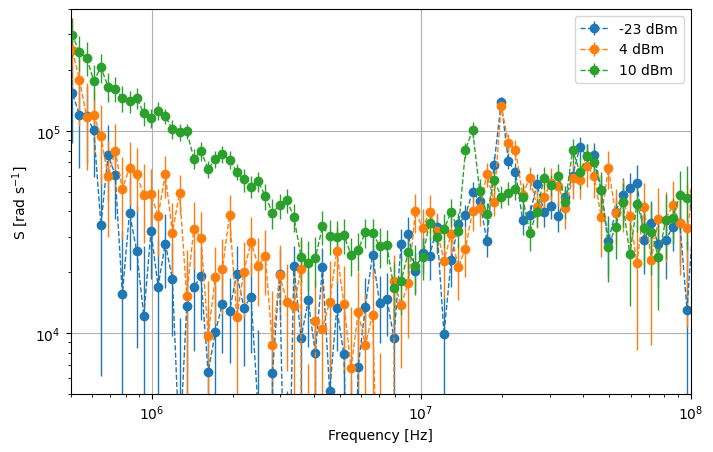

In [58]:
f,ax = plt.subplots(1,1, figsize = (8,5))

for meas_id in meas_ids:
    # datas[meas_id].S.plot(ax=ax, xscale='log', yscale='log', x = "freq", lw = 0,marker = 'o', label=f'{meas_id} {gains[meas_id]}')
    ax.errorbar(datas[meas_id].freq, datas[meas_id].S.isel(qubit = 0).rolling(amp = 1).mean(dim = 'amp'), yerr = datas[meas_id].S_error.isel(qubit = 0), 
                fmt='o', label=f'{gains[meas_id]} dBm', lw = 1, ls = '--')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('S [rad s$^{-1}$]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(5e5, 1e8)
ax.set_ylim(5e3, 4e5)
ax.grid()
ax.legend()



In [27]:
datas[meas_id].S.isel(qubit = 0)

<xarray.DataArray 'S' (amp: 200)> Size: 2kB
[200 values with dtype=float64]
Coordinates:
  * amp       (amp) float64 2kB 1e-05 1.063e-05 1.13e-05 ... 1.682 1.787 1.9
    freq      (amp) float64 2kB 1e+03 1.063e+03 1.13e+03 ... 1.787e+08 1.9e+08
    fit_vals  object 8B ...
    qubit     <U2 8B 'q1'
Attributes:
    long_name:  Noise spectral density
    units:      rad s^-1

In [6]:
meas_ids = [2304,2310, 2316]

datas = {}
node_parameters = {}
machines = {}
IF = {}  

for meas_id in meas_ids:
    datas[meas_id], machines[meas_id], node_parameters[meas_id] = load_dataset(meas_id, "noise_spectrum")
    IF[meas_id] = machines[meas_id].qubits[node_parameters[meas_id]['initial_parameters']['qubits'][0]].resonator.intermediate_frequency

# %%


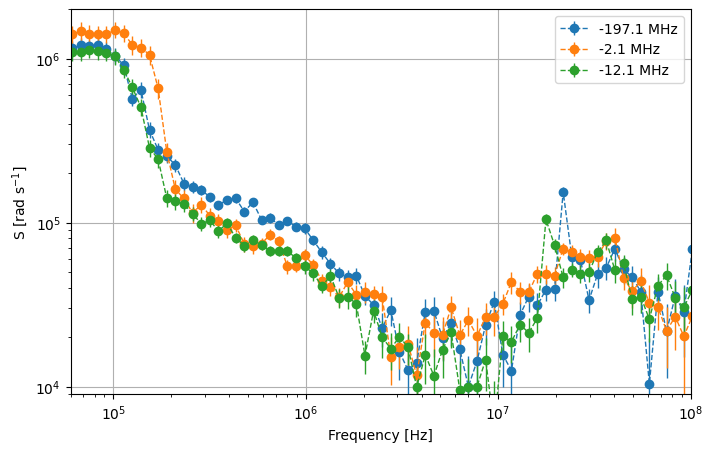

In [7]:
f,ax = plt.subplots(1,1, figsize = (8,5))

for meas_id in meas_ids:
    # datas[meas_id].S.plot(ax=ax, xscale='log', yscale='log', x = "freq", lw = 0,marker = 'o', label=f'{meas_id} {gains[meas_id]}')
    ax.errorbar(datas[meas_id].freq, datas[meas_id].S.isel(qubit = 0), yerr = datas[meas_id].S_error.isel(qubit = 0), 
                fmt='o', label=f'{IF[meas_id]/1e6:.1f} MHz', lw = 1, ls = '--')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('S [rad s$^{-1}$]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(6e4, 1e8)
ax.set_ylim(9e3, 2e6)
ax.grid()
ax.legend()



In [8]:
machines[meas_id].qubits[node_parameters[meas_id]['initial_parameters']['qubits'][0]].resonator

ReadoutResonatorMW(depletion_time=2500, frequency_bare=None, f_01=None, f_12=None, confusion_matrix=[[0.9295, 0.0705], [0.123, 0.877]], gef_centers=None, gef_confusion_matrix=None, digital_outputs={}, operations={'readout': SquareReadoutPulse(length=1500, id=None, digital_marker='ON', amplitude=0.002123456, axis_angle=None, threshold=-0.0002176762073097981, rus_exit_threshold=-0.0006391360905442085, integration_weights=None, integration_weights_angle=-63.799915779096125), 'const': SquarePulse(length=100, id=None, digital_marker=None, amplitude=0.125, axis_angle=None)}, id=None, sticky=None, intermediate_frequency=-12107812.0, thread=None, opx_input=MWFEMAnalogInputPort(controller_id='con1', fem_id=2, port_id=2, band=3, downconverter_frequency=7165000000, sampling_rate=1000000000.0, shareable=False), time_of_flight=264, smearing=0, LO_frequency=7165000000, RF_frequency=7152892188.0, opx_output=MWFEMAnalogOutputPort(controller_id='con1', fem_id=2, port_id=8, band=3, upconverter_frequency

(0.0, 35.0)

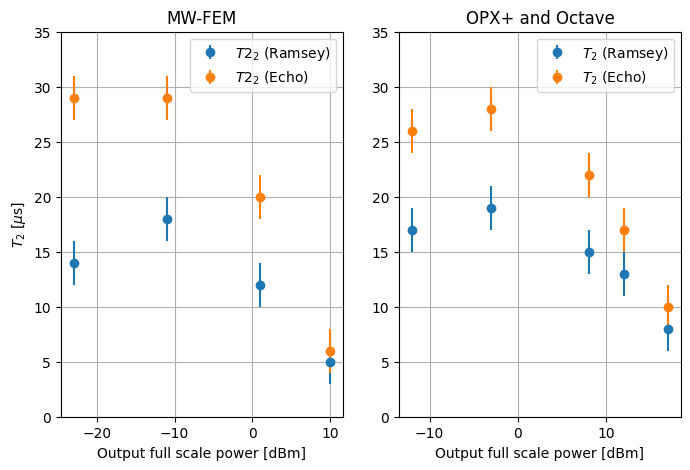

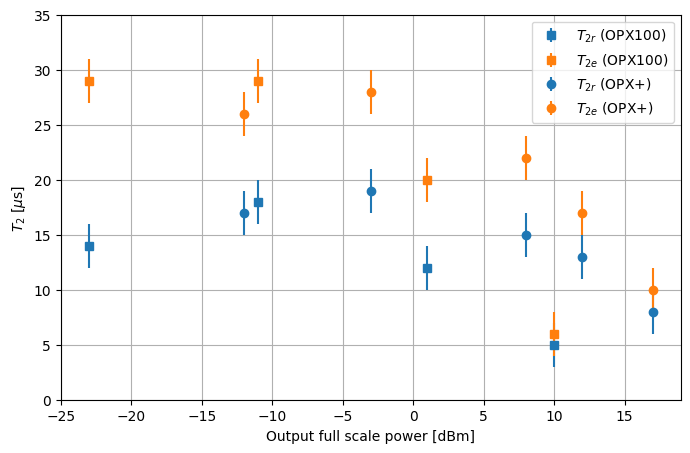

In [73]:
# MW T2s 2236 - 2213
scales_MW = [-23, -11, 1, 10]
T1s_MW = [28,26,24,27]
T2rs_MW = [14,18,12,5]
T2es_MW = [29,29,20,6]
errs_MW = [2,2,2,2]
T_gamma_r_MW = 1/(2/np.array(T2rs_MW)-1/np.array(T1s_MW))
T_gamma_e_MW = 1/(2/np.array(T2es_MW)-1/np.array(T1s_MW))


# octave T2s 1981-2005
scales_oct = [-19,-10,1,5,10]
T1s_oct = [21,21,21,20,21]
T2rs_oct = [17,19,15,13,8]
T2es_oct = [26,28,22,17,10]
errs_oct = [2,2,2,2,2]
T_gamma_r_oct = 1/(2/np.array(T2rs_oct)-1/np.array(T1s_oct))
T_gamma_e_oct = 1/(2/np.array(T2es_oct)-1/np.array(T1s_oct))


f,axs = plt.subplots(1,2, figsize = (8,5))

axs[0].errorbar(scales_MW, T2rs_MW, yerr = errs_MW, fmt = 'o', label = '$T2_2$ (Ramsey)')
axs[0].errorbar(scales_MW, T2es_MW, yerr = errs_MW, fmt = 'o', label = '$T2_2$ (Echo)')
axs[0].set_xlabel('Output full scale power [dBm]')
axs[0].set_ylabel('$T_2$ [$\mu$s]')
axs[0].grid()
axs[0].legend()
axs[0].set_title('MW-FEM')
axs[0].set_ylim(0,35)

axs[1].errorbar(7 + np.array(scales_oct), T2rs_oct, yerr = errs_oct, fmt = 'o', label = '$T_2$ (Ramsey)')
axs[1].errorbar(7 + np.array(scales_oct), T2es_oct, yerr = errs_oct, fmt = 'o', label = '$T_2$ (Echo)')
axs[1].set_xlabel('Output full scale power [dBm]')
# axs[1].set_ylabel('T2 [$\mu$s]')
axs[1].grid()
axs[1].legend()
axs[1].set_title('OPX+ and Octave')
axs[1].set_ylim(0,35)
# %%

f,ax = plt.subplots(1,1, figsize = (8,5))

ax.errorbar(scales_MW, T2rs_MW, yerr = errs_MW, fmt = 's', label = '$T_{2r}$ (OPX100)', c = 'C0')
ax.errorbar(scales_MW, T2es_MW, yerr = errs_MW, fmt = 's', label = '$T_{2e}$ (OPX100)', c = 'C1')
ax.set_ylabel('$T_2$ [$\mu$s]')
ax.errorbar(7 + np.array(scales_oct), T2rs_oct, yerr = errs_oct, fmt = 'o', label = '$T_{2r}$ (OPX+)', c = 'C0')
ax.errorbar(7 + np.array(scales_oct), T2es_oct, yerr = errs_oct, fmt = 'o', label = '$T_{2e}$ (OPX+)', c = 'C1')
ax.set_xlabel('Output full scale power [dBm]')
ax.grid()
ax.legend()
ax.set_ylim(0,35)


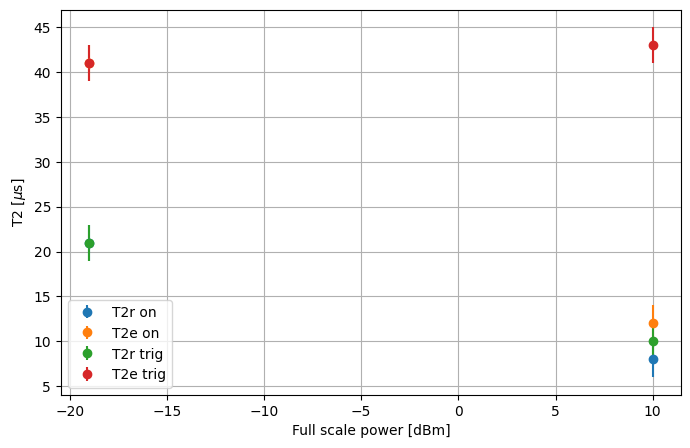

In [47]:
# octave T2s triggers 2390
scales = [10,-19]
T1s_on = [27,32]
T1s_trig = [29,32]
T2rs_on = [8,21]
T2es_on = [12,41]
T2rs_trig = [10,21]
T2es_trig = [43,41]
errs = [2,2]


f,ax = plt.subplots(1,1, figsize = (8,5))

ax.errorbar(scales, T2rs_on, yerr = errs, fmt = 'o', label = 'T2r on')
ax.errorbar(scales, T2es_on, yerr = errs, fmt = 'o', label = 'T2e on')
ax.errorbar(scales, T2rs_trig, yerr = errs, fmt = 'o', label = 'T2r trig')
ax.errorbar(scales, T2es_trig, yerr = errs, fmt = 'o', label = 'T2e trig')
ax.set_xlabel('Full scale power [dBm]')
ax.set_ylabel('T2 [$\mu$s]')
ax.grid()
ax.legend()

# %%

